# <font color = "Red">  Classifying Messages using Natural Language Processing(NLP)</font> <font color = "DarkGreen"> *By Harshit Dawar*

## <font color = "brown"> Information about Dataset

- Dataset is the Collection of the set of SMS that have been colleted for SMS Spam Research. It contains 5,574 messages in English tagged as Spam or Ham(legitimate) messages.

- File contains 1 message per line. Each line is composed of 2 columns: "Label" and "Raw Text".

## <font color = "Brown"> Importing Required Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer    # It is used to transalte words into numbers
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("emails.csv")

In [3]:
data.head()

text  spam
0  Subject: naturally irresistible your corporate...     1
1  Subject: the stock trading gunslinger  fanny i...     1
2  Subject: unbelievable new homes made easy  im ...     1
3  Subject: 4 color printing special  request add...     1
4  Subject: do not have money , get software cds ...     1

In [4]:
data.tail()

text  spam
5723  Subject: re : research and development charges...     0
5724  Subject: re : receipts from visit  jim ,  than...     0
5725  Subject: re : enron case study update  wow ! a...     0
5726  Subject: re : interest  david ,  please , call...     0
5727  Subject: news : aurora 5 . 2 update  aurora ve...     0

In [5]:
data.shape

(5728, 2)

In [6]:
data.describe()

spam
count  5728.000000
mean      0.238827
std       0.426404
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
text    5728 non-null object
spam    5728 non-null int64
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


## <font color = "Brown"> Visualzing Dataset

In [8]:
legitimate_data = data[data["spam"] == 0]

In [9]:
legitimate_data

text  spam
1368  Subject: hello guys ,  i ' m " bugging you " f...     0
1369  Subject: sacramento weather station  fyi  - - ...     0
1370  Subject: from the enron india newsdesk - jan 1...     0
1371  Subject: re : powerisk 2001 - your invitation ...     0
1372  Subject: re : resco database and customer capt...     0
...                                                 ...   ...
5723  Subject: re : research and development charges...     0
5724  Subject: re : receipts from visit  jim ,  than...     0
5725  Subject: re : enron case study update  wow ! a...     0
5726  Subject: re : interest  david ,  please , call...     0
5727  Subject: news : aurora 5 . 2 update  aurora ve...     0

[4360 rows x 2 columns]

In [10]:
spam_data = data[data["spam"] == 1]

In [11]:
spam_data

text  spam
0     Subject: naturally irresistible your corporate...     1
1     Subject: the stock trading gunslinger  fanny i...     1
2     Subject: unbelievable new homes made easy  im ...     1
3     Subject: 4 color printing special  request add...     1
4     Subject: do not have money , get software cds ...     1
...                                                 ...   ...
1363  Subject: are you ready to get it ?  hello !  v...     1
1364  Subject: would you like a $ 250 gas card ?  do...     1
1365  Subject: immediate reply needed  dear sir ,  i...     1
1366  Subject: wanna see me get fisted ?  fist  bang...     1
1367  Subject: hot stock info : drgv announces anoth...     1

[1368 rows x 2 columns]

In [12]:
print("Spam Percentage: ", (len(spam_data)/len(data))*100, "%")

Spam Percentage:  23.88268156424581 %


In [13]:
print("Ham Percentage: ", (len(legitimate_data)/len(data))*100, "%")

Ham Percentage:  76.11731843575419 %


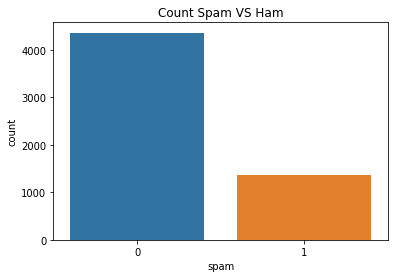

In [47]:
sns.countplot(data["spam"], label = "Count Spam VS Ham")
plt.title("Count Spam VS Ham")
plt.show()

## <font color = "Brown"> Example of Count Vectorizer

In [15]:
sample_vect = CountVectorizer()
x = sample_vect.fit_transform(["Harshit Dawar","This is second line","Harshit Dawar Harshit Dawar Harshit"])

In [16]:
# displays the count of the words in the data.
print(x.toarray())

[[1 1 0 0 0 0]
 [0 0 1 1 1 1]
 [2 3 0 0 0 0]]


In [17]:
print(sample_vect.get_feature_names())

['dawar', 'harshit', 'is', 'line', 'second', 'this']


## <font color = "Brown"> Processing the Data

In [18]:
vectorizer = CountVectorizer()

In [19]:
spamvect = vectorizer.fit_transform(data["text"])

In [20]:
print(vectorizer.get_feature_names())

['00', '000', '0000', '000000', '00000000', '0000000000', '000000000003619', '000000000003991', '000000000003997', '000000000005168', '000000000005409', '000000000005411', '000000000005412', '000000000005413', '000000000005820', '000000000006238', '000000000006452', '000000000007494', '000000000007498', '000000000007876', '000000000010552', '000000000011185', '000000000012677', '000000000012734', '000000000012735', '000000000012736', '000000000012738', '000000000012741', '000000000012987', '000000000013085', '000000000013287', '000000000015384', '000000000015793', '000000000023619', '000000000024099', '000000000025307', '000000000025312', '000010220', '0000102317', '0000102374', '0000102789', '0000104281', '0000104282', '0000104486', '0000104631', '0000104730', '0000104776', '0000104778', '0000107043', '0000108729', '000066', '0001', '000166', '0002', '000202', '0003', '0004', '0005', '0006', '00076', '0009249480', '0009249481', '0009249504', '0009249505', '0009249506', '001', '0011', 

In [21]:
print(spamvect.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [4 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [22]:
# It signifies that CountVectorizer has selected 37303 words and marked its ocurences

print(spamvect.shape)

(5728, 37303)


## <font color = "Brown"> Training the Model

In [23]:
NB_classifier = MultinomialNB()

In [24]:
data["spam"].values

array([1, 1, 1, ..., 0, 0, 0])

In [25]:
NB_classifier.fit(spamvect, data["spam"])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [26]:
test_sample = ["Get 35000$ in you account now","Hello Harshit Dawar, I would like to book a world Tour Ticket!"]
test_sample_vect = vectorizer.transform(test_sample)

In [27]:
NB_classifier.predict(test_sample_vect)

array([1, 0])

In [28]:
x = spamvect
y = data["spam"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15)

In [29]:
spam_ham_classifier = MultinomialNB()

In [30]:
spam_ham_classifier.fit(x_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## <font color = "Brown"> Testing the Model

In [31]:
y_pred = spam_ham_classifier.predict(x_test)

In [32]:
print("Accuracy of the Model is: %.3f"%(accuracy_score(y_pred, y_test)*100))

Accuracy of the Model is: 99.302


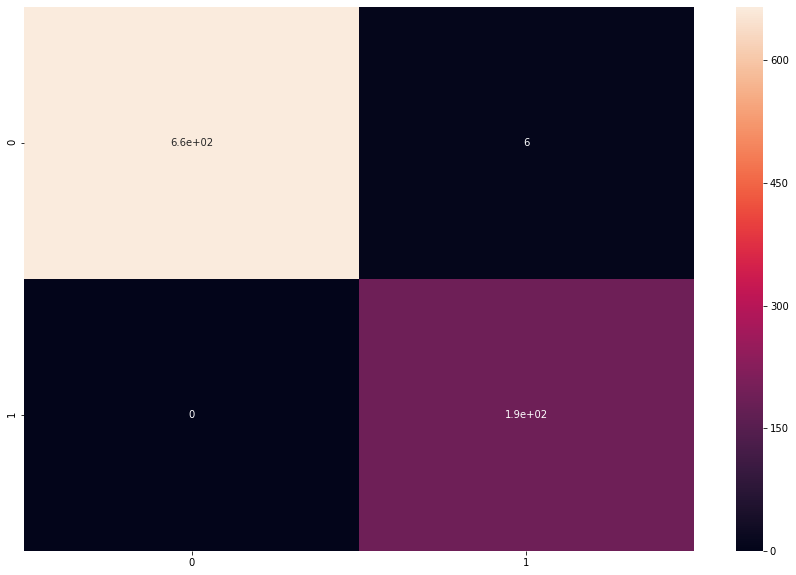

In [46]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (15,10))
fix = sns.heatmap(cm, annot = True)

# Below 2 lines are used to fix the topa and bottom boundary cut issue of matplotlib 3.1.1
top, bottom = fix.get_ylim()
fix.set_ylim(top + 0.5, bottom - 0.5)
plt.show()

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       671
           1       0.97      1.00      0.98       189

    accuracy                           0.99       860
   macro avg       0.98      1.00      0.99       860
weighted avg       0.99      0.99      0.99       860



## <font color = "brown"> Project Done!!!!!